# __DATA ANALYSIS ON COVID-19 IN KOREA__


In [1]:
# COVID-19 KOREA DATA ANALYSIS
# ----------------------------------------------------------------------------------------------------------------


# INITIATION ------------

# System information
import os

# Data preparation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skimage as ski
import seaborn as sns
from tabulate import tabulate

# Data transformation & algorithms
import numpy as np
import scipy as sp

# Miscellaneous
import math


print(
    'CURRENT DIRECTORY:\n'
    '. = \"', os.getcwd(), '\"', sep=''
)

for dirName, _, filenames in os.walk('.'):
    if dirName[2:3] != '.':
        print('\n', dirName, sep='')
        for filename in filenames:
            print(os.path.join(dirName, filename))


CURRENT DIRECTORY:
. = "G:\My Drive\Codes\.Projects\DS\Turing\1 Data Wrangling with Python\S4\Project"

.
.\.gitignore
.\Analysis_COVID19.ipynb


## Familiarization with the Data

The first step in our data analysis is to import the dataset and familiarize ourselves with its structure and
features. The dataset scrapped from Coursera website contains information about various aspects of the popular
courses that have been published on Coursera up until 2021.

I will use the pandas library to load the data into a DataFrame and explore its shape, columns, and summary
statistics. This will help us identify any potential issues with the data quality, such as missing values, outliers, or incorrect formats. We will also visualize some key variables using matplotlib and seaborn to gain insights into the distribution and relationships of the data.


In [330]:
# EXECUTION -------------

# Display plots directly in the notebook interface
%matplotlib inline

# Convert dataset into dataframe
DATA = pd.read_csv(
    '.\data\coursera_courses.csv',
    index_col='Unnamed: 0'
)

# Format indices & rearrange the rows
DATA.index.name = 'ID'
DATA = DATA.sort_index()

# Format columns' titles
DATA.columns = DATA.columns.map(lambda name: ' '.join(map(lambda word: word.title(), name.split('_')[1:])))
DATA = DATA.rename(columns={'Students Enrolled': 'Enrolment'})

# Flag to indicate dataset has not been processed
preprocessed = False

# First 10 observations
DATA.head(10)


,Title,Organization,Certificate Type,Rating,Difficulty,Enrolment
ID,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
7,Business Foundations,University of Pennsylvania,SPECIALIZATION,4.7,Beginner,510k
8,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220k


### Improving Readability
One of the steps in data analysis is to improve the readability and format of the dataset.

For the numerical data, I will convert enrolment collumn into numeric values. Furthermore, for the categorical
data, I will standardize the difficulty level column by replacing the values 'Mixed', 'Beginner', 'Intermediate',
and 'Advanced' with 'M', 'B', 'I', and 'A' respectively. This will reduce the length of the values and make them
more concise. Similarly, I will also standardize the types of certificates with 'C' for 'Course',
'S' for 'Specialization', and 'P' for 'Professional Certificate'.

By improving the readability and format of the dataset, we can enhance the quality and clarity of the data analysis. We can also save time and space when performing operations on the data.


### About the Difficulties
On the other hand, it is possible that the degree of difficulties of the courses can be considered an ordinal variable, and through further simplification and assumptions, can be considered a ratio variable. By considering the degree of difficulties to have an exponential scale and with further mathematical manipulation, it is possible to assign the values 1 to 4 for the these categories of difficulties from lowest to highest, as the average degree of difficulty.

In [331]:
# Improve Dataset's Readability & Reformat Numerical & Categorical Data
if not preprocessed:
    ## Enrolment quantity
    print(
    "Number of different abbreviations in 'Number of Enrolment' data:",
    ', '.join(DATA['Enrolment'].str[-1].unique()),
    end='.\n'
)

    DATA['Enrolment'] = \
        DATA['Enrolment'].str[:-1].astype(float)*\
        DATA['Enrolment'].str[-1].map(lambda abbr: 1 if abbr=='k' else 1000)

    ## Difficulty
    DATA['Difficulty'] = DATA['Difficulty'].str[0]

    ## Types of certificates
    DATA['Certificate Type'] = DATA['Certificate Type'].str[0]

    ## Create numerical values for difficulty
    DATA['Difficulty'] = DATA['Difficulty'].map({'B': 1, 'I': 2, 'M': 3, 'A': 4})

print('# Enrolment is changed to numerical values.')
print('# Categorical data are simplified and reformatted')
print('# Numerical values for different difficulty levels are assigned.')

preprocessed = True


Number of different abbreviations in 'Number of Enrolment' data: k, m.
# Enrolment is changed to numerical values.
# Categorical data are simplified and reformatted
# Numerical values for different difficulty levels are assigned.


In [332]:
# Number of observations and features
print(f"Number of Observations: {DATA.shape[0]}; \n"
      f"Number of Features: {DATA.shape[1]}.")

## List of the names of columns with quantitative data
columns_names = DATA.select_dtypes(include='object').columns.tolist()
## List of the names of columns with quantitative data
columns_numeric = DATA.select_dtypes(include=('float64', 'int64', 'int', 'float')).columns.tolist()

print(f"- Categorical features: {', '.join(columns_names)}; \n"
      f"- Numerical features: {', '.join(columns_numeric)}.")

DATA.head(10)


Number of Observations: 891; 
Number of Features: 6.
- Categorical features: Title, Organization, Certificate Type; 
- Numerical features: Rating, Difficulty, Enrolment.


,Title,Organization,Certificate Type,Rating,Difficulty,Enrolment
ID,,,,,,
0,IBM Data Science,IBM,P,4.6,1,480.0
1,Introduction to Data Science,IBM,S,4.6,1,310.0
2,The Science of Well-Being,Yale University,C,4.9,3,2500.0
3,Python for Everybody,University of Michigan,S,4.8,1,1500.0
4,Google IT Support,Google,P,4.8,1,350.0
5,Deep Learning,deeplearning.ai,S,4.8,2,690.0
6,Machine Learning,Stanford University,C,4.9,3,3200.0
7,Business Foundations,University of Pennsylvania,S,4.7,1,510.0
8,Applied Data Science,IBM,S,4.6,1,220.0


In [333]:
# Descriptive statistics of the data
DATA.describe().T


,count,mean,std,min,25%,50%,75%,max
Rating,891.0,4.677329,0.162225,3.3,4.6,4.7,4.8,5.0
Difficulty,891.0,1.705948,0.869559,1.0,1.0,1.0,2.0,4.0
Enrolment,891.0,90.552076,181.936454,1.5,17.5,42.0,99.5,3200.0


## Data Cleaning
Before analyzing the Coursera dataset, some data cleaning steps will be performed to ensure the quality and
validity of the data. In this section, we will describe the data cleaning process that we applied to the Coursera dataset.



First, any observations with erroneous values that are in unsuitable formats or missing values will be handled.

In [334]:
# HANDLING ERRONEOUS VALUES

# Analyze possible invalid data
rows_NaN = DATA.isnull().any(axis=1)

if rows_NaN.any():  # check if any observations have unrepresentable values
    print('Invalid observations:\n', DATA[rows_NaN])

else:
    print('Invalid values not found.')

# Analyze possible missing data
rows_NA = DATA.isna().any(axis=1)

if rows_NA.any():  # check if any observations have missing values
    print('Observations with missing values:\n', DATA[rows_NA])

else:
    print('Missing values not found.')

# Cleaning the dataset
## Observations with erroneous non-numeric data such as Title, Organization, Certificate Type, and Difficulty are
# removed;
DATA.dropna(subset='Title, Organization, Certificate Type, Difficulty'.split(', '), inplace=True)
## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
DATA.fillna(DATA.median(numeric_only=True, skipna=True), inplace=True)


print('\n# Dataset no longer contains unrepresentable or missing data.')


Invalid values not found.
Missing values not found.

# Dataset no longer contains unrepresentable or missing data.


Second, any duplicate samples and features based on IDs and names will be investigated further from the dataset to understand the reasons behind these duplicates and to avoid redundancy and bias.

In [335]:
# REMOVING DUPLICATE SAMPLES & FEATURES

# Remove duplicated IDs
ids_unique = DATA.index.unique()
ids_duplicated = DATA.index[DATA.index.duplicated()]

if ids_unique.size != DATA.shape[0]:
    print('Duplicated IDs found.')
    print('- No. Unique IDs:', ids_unique.size)
    print('- Duplicated IDs:', ', '.join(ids_duplicated))

    DATA = DATA[~ids_duplicated]

else:
    print('Duplicated IDs not found.')


Duplicated IDs not found.


In [336]:
# Investigate duplicated titles
titles_unique = DATA['Title'].unique()
courses_duplicated = DATA['Title'][DATA['Title'].duplicated()]

if titles_unique.size != DATA.shape[0]:
    print('Duplicated courses found.')
    print('- No. Unique Courses:', titles_unique.size)
    print(
        '- Duplicated Courses:',
        ''.join(map(
            lambda i, title: f'\n    {i}. {title}',
            range(1, courses_duplicated.size + 1),
            courses_duplicated
        ))
    )

    # DATA.drop_duplicates(subset='Title', inplace=True)

else:
    print('Duplicated courses not found.')


# print('\n# Dataset no longer contains duplicated observations.')


Duplicated courses found.
- No. Unique Courses: 888
- Duplicated Courses: 
    1. Machine Learning
    2. Marketing Digital
    3. Developing Your Musicianship


The results showed that there were three duplicated courses: Machine Learning, Marketing Digital, and Developing
Your Musicianship. We then will examine in more detail why this was the case.

In [337]:
#
DATA[DATA['Title'].isin(courses_duplicated)]


,Title,Organization,Certificate Type,Rating,Difficulty,Enrolment
ID,,,,,,
6,Machine Learning,Stanford University,C,4.9,3,3200.0
181,Machine Learning,University of Washington,S,4.6,2,290.0
205,Developing Your Musicianship,Berklee College of Music,S,4.8,1,54.0
241,Marketing Digital,Universidade de São Paulo,C,4.8,1,81.0
325,Marketing Digital,Universidad Austral,S,4.7,1,39.0
756,Developing Your Musicianship,Berklee College of Music,C,4.8,3,41.0


The first two identical courses are those at the 6th and 181th indices. These two courses have the same title, "Machine Learning," but are offered by different institutions. It is important to note that each institution may have a different approach, content, or teaching style for the same subject. Therefore, the duplicated courses in this case provide learners with multiple options to choose from.

Similar to the previous case, "Marketing Digital" is the title shared by two courses offered by different institutions. Each course may have its own unique approach to teaching digital marketing concepts and strategies, providing learners with diverse perspectives.

On the other hand, the two courses titled "Developing Your Musicianship" are offered by the same institution, Berklee College of Music. However, they serve different purposes within the specialization in music theory. One is an intermediate course focusing on developing musicianship skills, while the other is the overall specialization in music theory of which the former course is a part. The similarity in naming can be attributed to the fact that "Developing Your Musicianship" is the first topic within the specialization.

As a result, all six of these observations can be considered valid, and we need not modify them any further.


Third, any outliers in the numeric variables will be treated by observing boxplots and calculating the interquartile
range (IQR) for each variable. Any values that are more than 1.5 times the IQR above or below the first or third
quartile will be considered potential outliers which will require further careful treatment.

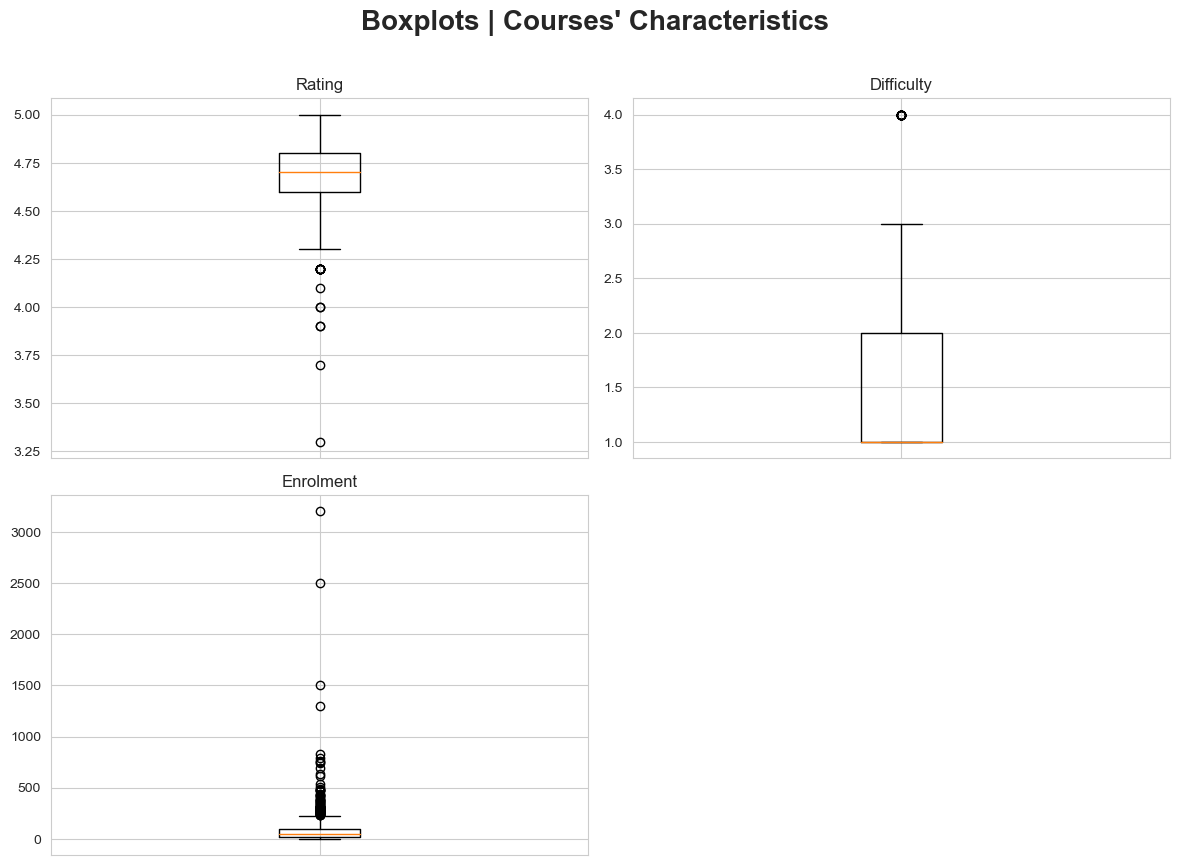

In [338]:
# TREATING OUTLIERS

# Boxplots of quantitative data
## Create a figure with subplots
n_cols = math.ceil(math.sqrt(len(columns_numeric)))
figure, axes = plt.subplots(
    ncols=n_cols,
    nrows=math.ceil(len(columns_numeric)/n_cols),
    dpi=100,
    figsize=(12, 9)
)
axes = axes.flatten()

## Plot a boxplot for each column
for i, col in enumerate(columns_numeric):
    axes[i].boxplot(DATA[col])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xticklabels([])
    axes[i].grid(visible=True)

## Remove the last empty subplot, adjust layout and title
figure.suptitle(
    'Boxplots | Courses\' Characteristics\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

for i in range(len(columns_numeric), len(axes)):
    figure.delaxes(axes[i])

## Display the plot
plt.show()


The boxplot analysis revealed that the students' ratings and enrolment quantities in the dataset have extreme
values that deviate significantly from the rest of the data. Furthermore, the courses' difficulties are
essentially categorical variables masked as numerical values, therefore, having only four different values, the
'extreme' values should not be considered outliers. Outliers can affect the statistical summary and inference of the data, so it is important to examine them carefully and understand their causes and implications.

Therefore, the usage of letter-value plots to inspect these variables should be deemed more appropriate.


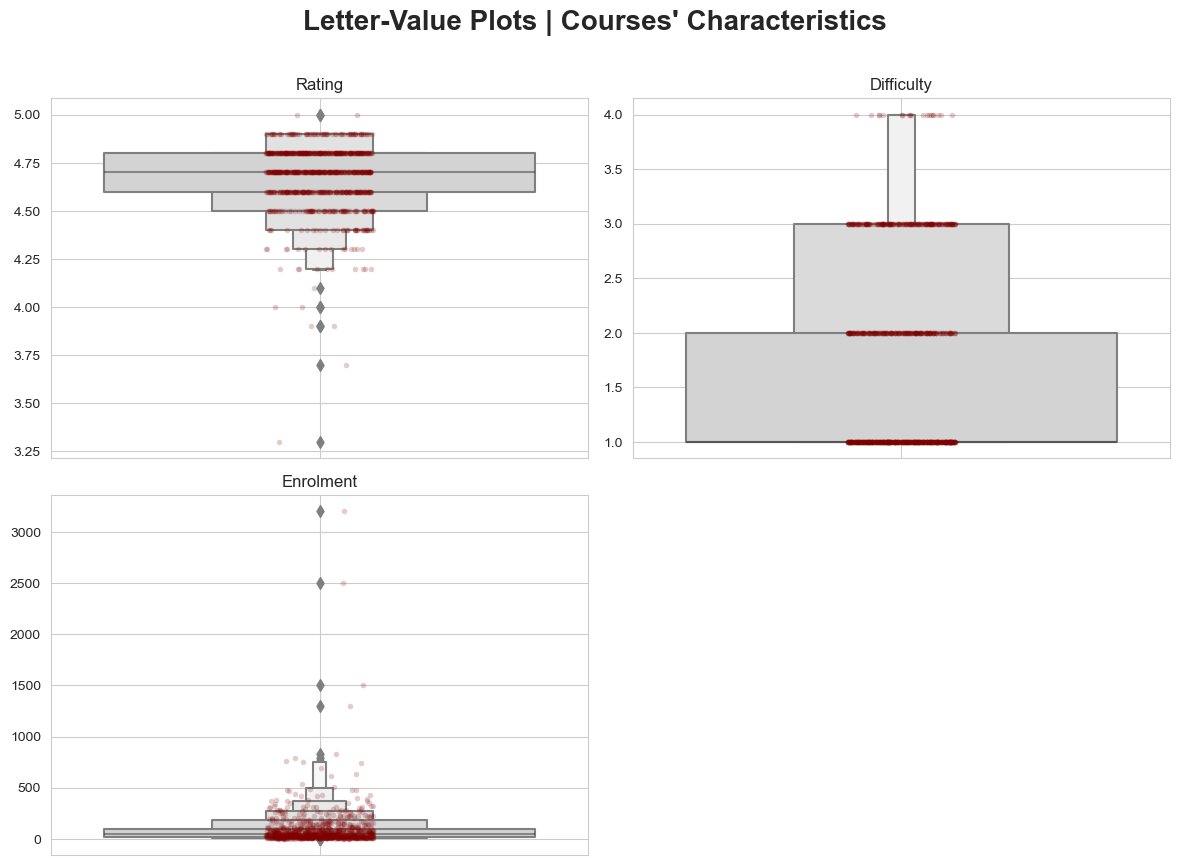

In [339]:
# Letter-value plots of quantitative data
## Create a figure with subplots
n_cols = math.ceil(math.sqrt(len(columns_numeric)))
figure, axes = plt.subplots(
    ncols=n_cols,
    nrows=math.ceil(len(columns_numeric)/n_cols),
    dpi=100,
    figsize=(12, 9)
)
axes = axes.flatten()

## Plot a boxen plot for each column
for i, col in enumerate(columns_numeric):
    sns.boxenplot(DATA[col], ax=axes[i], color='lightgray')
    sns.stripplot(data=DATA[col], size=4, color="maroon",alpha=0.2, ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel('')
    axes[i].set_xticklabels([])
    axes[i].grid(visible=True)

## Remove the last empty subplot, adjust layout and title
figure.suptitle(
    'Letter-Value Plots | Courses\' Characteristics\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

for i in range(len(columns_numeric), len(axes)):
    figure.delaxes(axes[i])

## Display the plot
plt.show()

In the following sections, I will explore each of these variables in more detail and discuss possible ways to handle the outliers.


In [340]:
# Closer look at Rating & Enrolment
## Columns with outliers according to the boxplots
columns_wOutliers = 'Rating, Enrolment'.split(', ')

## Loop through each column with outliers
for col in columns_wOutliers:
    ### Compute IQR and select columns of interest
    q1, q3 = DATA[col].quantile((.25, .75))
    IQRange = q3 - q1
    cols = ['Title','Organization', col]

    ### Select rows with values outside the IQR
    courses_sus = DATA[cols][(DATA[col] < q1 - 1.5 * IQRange) | (DATA[col] > q3 + 1.5 * IQRange)]

    ### Rearrange the 'outlier' rows based on data of interest
    courses_sus.sort_values(col, inplace=True, ascending=False)
    courses_sus.reset_index(drop=True, inplace=True)
    courses_sus.index += 1

    ### Display the outliers
    print(
        f"CHARACTERISTIC: {col.upper()}\n"
        f"{tabulate(courses_sus, tablefmt='simple')}\n"
        f"\n"
    )


CHARACTERISTIC: RATING
--  ---------------------------------------------------------------  ------------------------------------------  ---
 1  Unity XR: How to Build AR and VR Apps                            Unity                                       4.2
 2  Foundations of Marketing Analytics                               Emory University                            4.2
 3  Cybersecurity and Its Ten Domains                                University System of Georgia                4.2
 4  Hardware Description Languages for FPGA Design                   University of Colorado Boulder              4.2
 5  Project Execution                                                University of California, Irvine            4.2
 6  Introduction to Spreadsheets and Models                          University of Pennsylvania                  4.2
 7  Aprende a programar con Python                                   Universidad Austral                         4.2
 8  Mastering Data Analysis in Excel     

Ratings are subjective evaluations that reflect how much a person likes or dislikes a course, and number of participants are counts of how many people decided to join or participate in that course. These variables are not random or objective, but rather influenced by various factors that can vary across individuals and contexts.

One factor that can affect human-influenced variables is motivation. Different people may have different levels of motivation to provide ratings or to participate in something. For example, some people may rate a course only if they are extremely satisfied or dissatisfied with it, while others may rate it regardless of their experience. Similarly, some people may participate in it only if they are interested in the topic or incentivized by a reward, while others may participate out of curiosity or obligation. These differences in motivation can create outliers in the data, such as very high or low ratings or very large or small numbers of participants.

Another factor that can affect human-influenced variables is bias. Bias can affect how people rate or participate in something, regardless of its actual quality or value. For example, some people may rate a product higher or lower than it deserves because they have a positive or negative impression of the institutions (e.g., MIT) or subject. Similarly, some people may participate more or less in something because they have a favorable or unfavorable attitude towards the subject (e.g. Machine Learning), the researcher, or the purpose. These biases can create outliers in the data, such as inflated or deflated ratings or skewed numbers of participants.

Consequently, it is advisable to retain even the extreme, random/irregular observations regardless of the distribution of these human-influenced characteristics. Furthermore, a detailed analysis of these particular observations from these variables will be essential to consider during exploratory data analysis.

## Exploratory Data Analysis
In the following analysis, I am going to:

- Analyze the correlation between the numerical variables in the dataset, such as rating, number of ratings, and number of enrollments.
- Inspect the relationship between the numerical variables and the categorical variables, such as topic, organization, difficulty level, and certificate type.
- Visualize how these numerical variables are distributed across different topics, organizations, and types of certificates.
- Inspect the progress of Coursera's popularity over time by analyzing the changes in ratings and quantity of enrollment.


### Correlations
In the next section, we will analyze the correlation between different characteristics of a course. We will use a
correlation matrix and a heatmap to visualize the strength and direction of the relationships between them.

We will also identify which features are strongly positively correlated; which features are strongly negatively correlated; and which features are not correlated, meaning that they have no linear relationship with each other. This analysis will help us understand the patterns and trends in the data and generate insights for further exploration.


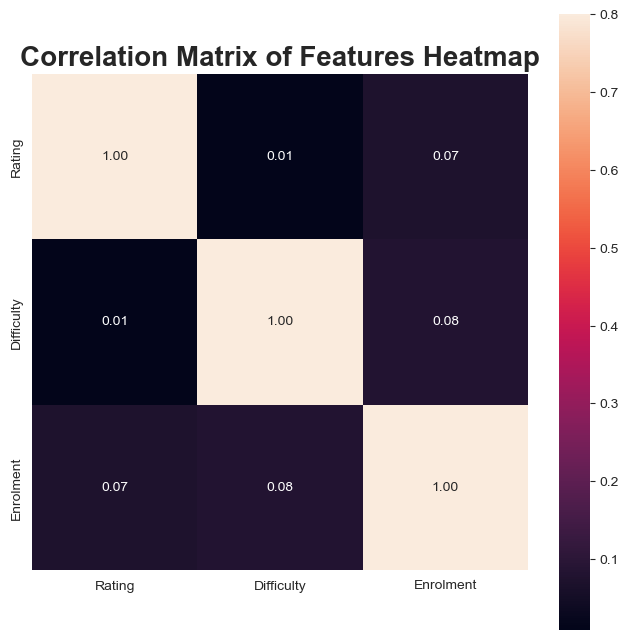

In [341]:
# Heatmap that represents the correlation matrix of the numeric data
## Create a square figure
figure = plt.figure(figsize=(8, 8))

## Correlations of numerical features
Correlations = DATA[columns_numeric].corr()
Correlations_triu = Correlations.where(np.triu(np.ones(Correlations.shape), k=1).astype(bool))

## Create heatmap
sns.heatmap(
    Correlations,
    vmax=.8,
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 10}
)

# Format plot's details (title)
plt.title('Correlation Matrix of Features Heatmap', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Display the plot
plt.show()


The heatmap indicates there exists no relationships between any pairs among the ratings, difficulty levels, and
quantity of enrolment. Let's investigate this more precisely through a scatter-plot of these variables.

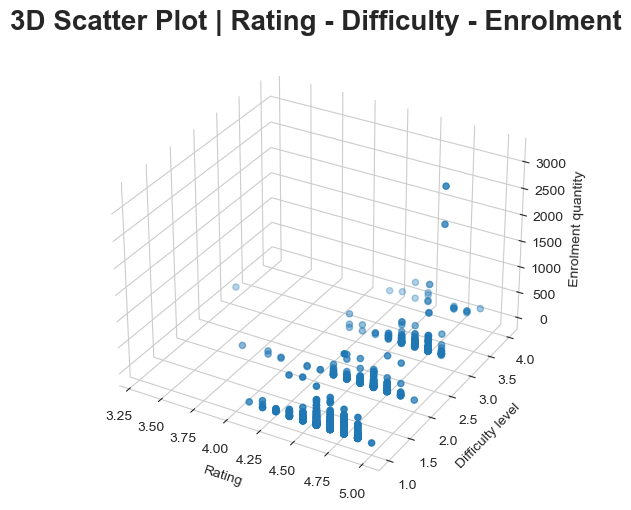

In [342]:
# Create figure and axes
fig = plt.figure(dpi=100, figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the variables
ax.scatter3D(DATA['Rating'], DATA['Difficulty'], DATA['Enrolment'])

# Set plot's background color
ax.set_facecolor('none')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Set plot's labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Difficulty level')
ax.set_zlabel('Enrolment quantity')
ax.set_title('3D Scatter Plot | Rating - Difficulty - Enrolment', fontsize=20, fontweight='bold')

# Show the plot
plt.show()

### Ratings vs. Enrolment Quantities
Despite the low correlations between these variables, we can observe the distribution of courses enrolment across
 different ratings.


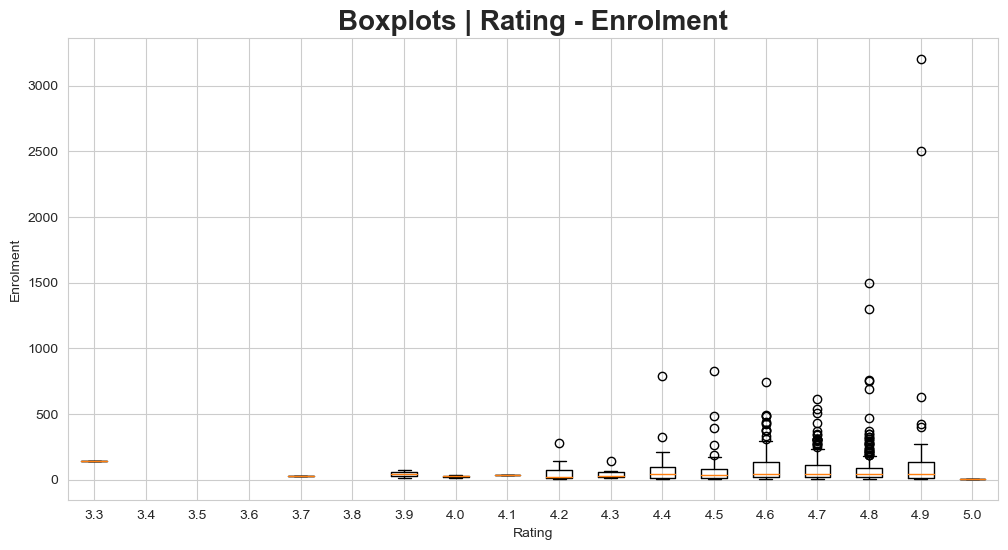

In [343]:
# DATA.plot.scatter(x='Rating', y='Enrolment')
# DATA.groupby('Rating').boxplot(column='Enrolment')

# Store data for each rating
def round_to(n, base=1):
    return round(base*round(n/base), 1)


round_to = np.vectorize(round_to)
prec = .1
DATA_grouped = DATA.assign(R=round_to(DATA['Rating'], prec))
x_ticks = np.arange(min(DATA_grouped['R']), max(DATA_grouped['R']) + prec, prec).round(1)
boxplot_data = [DATA_grouped[DATA_grouped['R'] == score]['Enrolment'] for score in x_ticks]

# Create the boxplots
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data)

# Set the x-axis tick labels to the categories
plt.xticks(range(1, len(boxplot_data) + 1), x_ticks)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Enrolment')
plt.title('Boxplots | Rating - Enrolment', fontsize=20, fontweight='bold')

# Display the plot
plt.show()


The plot demonstrates the distribution of the data when enrolment is observed across different ratings and
implies that courses with increasing ratings are likely to have extreme number of enrolment.

### Difficulty Levels vs. Enrolment Quantities



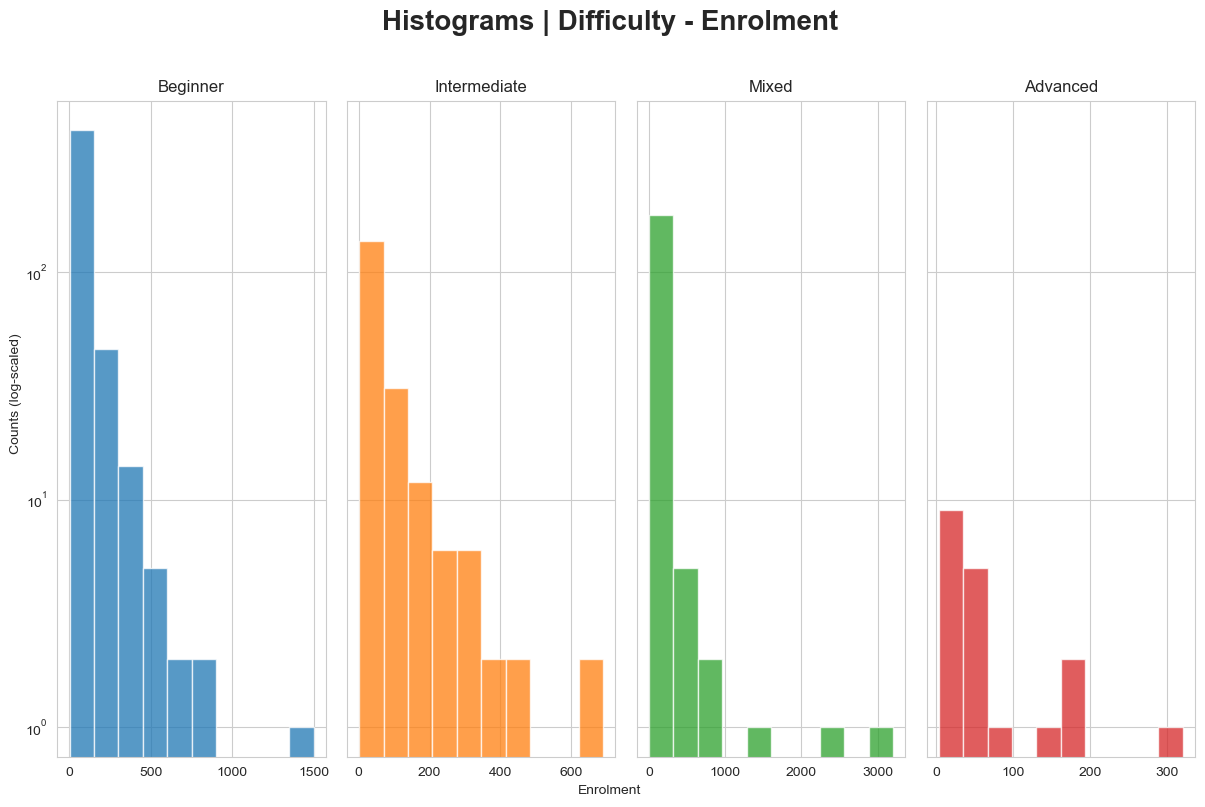

In [344]:
figure, axes = plt.subplots(
    nrows=1,
    ncols=DATA['Difficulty'].nunique(),
    figsize=(12, 8),
    sharey=True
)

for i, level in enumerate(['Beginner', 'Intermediate', 'Mixed', 'Advanced']):
    axes[i].hist(DATA[DATA['Difficulty'] == i + 1]['Enrolment'], bins=10, alpha=0.75, color=plt.cm.tab10(i))
    axes[i].set_title(level)

# Set y-axis scale to logarithmic
plt.yscale('log')

# Set title
figure.suptitle(
    'Histograms | Difficulty - Enrolment\n',
    fontsize=20,
    fontweight='bold'
)

# Set common x-axis and y-axis labels
figure.text(.5, 0, 'Enrolment', ha='center')
figure.text(0, .5, 'Counts (log-scaled)', va='center', rotation='vertical')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Ratings vs. Difficulty Levels


Text(0.5, 0, 'Rating')

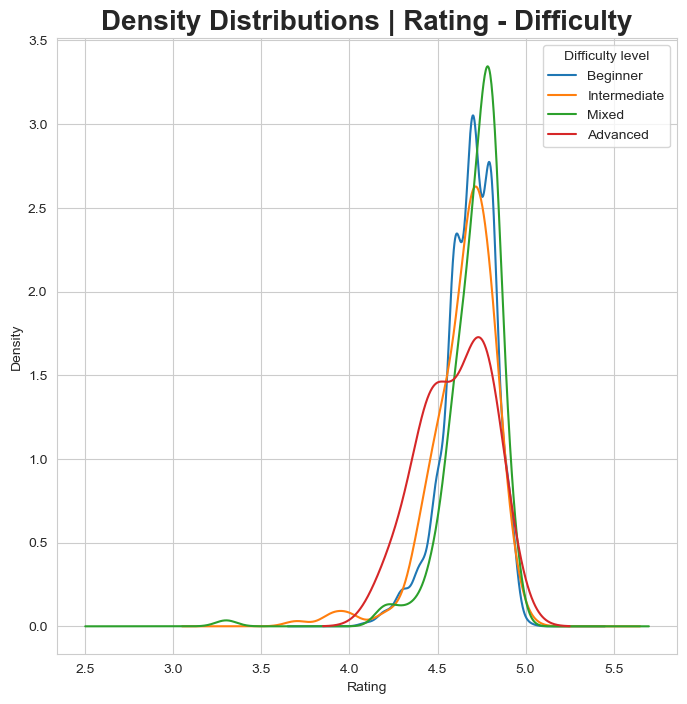

In [345]:
# Create plot of density distribution
difficulty = ['Beginner', 'Intermediate', 'Mixed', 'Advanced']
DATA.groupby('Difficulty')['Rating'].plot.kde(figsize=(8, 8))
plt.legend(difficulty, title='Difficulty level')

# Set the axis labels and plot title
plt.title(
    'Density Distributions | Rating - Difficulty',
    fontsize=20,
    fontweight='bold'
)
plt.xlabel('Rating')

### Types of Certificates vs. Difficulty Levels



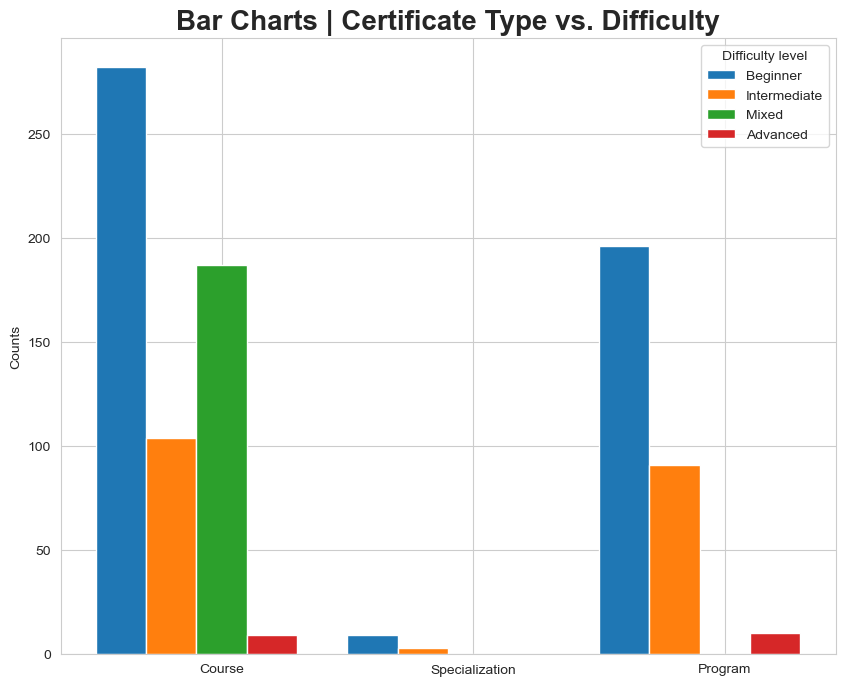

In [346]:
# Group the dataset by Type of Certificates and Difficulty and get the counts
DATA_grouped = DATA.groupby(['Certificate Type', 'Difficulty']).size().unstack().fillna(0)

# Set the labels and values for the bar chart
certificates = ['Course', 'Specialization', 'Program']
pos = np.arange(len(certificates))*2
difficulty_a_counts = DATA_grouped[1]
difficulty_b_counts = DATA_grouped[2]

# Set the width of the bars
bar_width = 0.4

# Create the figure and axes
figure, ax = plt.subplots(figsize = (10,8))

# Create the bar charts
for i, shift in enumerate(np.arange(-bar_width*2, bar_width*2, bar_width)):
    ax.bar(pos + shift, DATA_grouped[i + 1], width=bar_width, label=difficulty[i])

# Set the x-ticks to the middle of the bars
plt.xticks(pos, certificates)

# Set the axis labels and title
ax.set_ylabel('Counts')
ax.set_title(
    'Bar Charts | Certificate Type vs. Difficulty',
    fontsize=20,
    fontweight='bold'
)

# Add a legend
ax.legend(title='Difficulty level')

# Show the plot
plt.show()

### Coursera Over Time
I will now analyze the distribution and change of the descriptive characteristics of Coursera courses over time. The indices of the courses are assume to indicate the order in which the courses were first published on Coursera.


Text(0.5, 0, 'Rating')

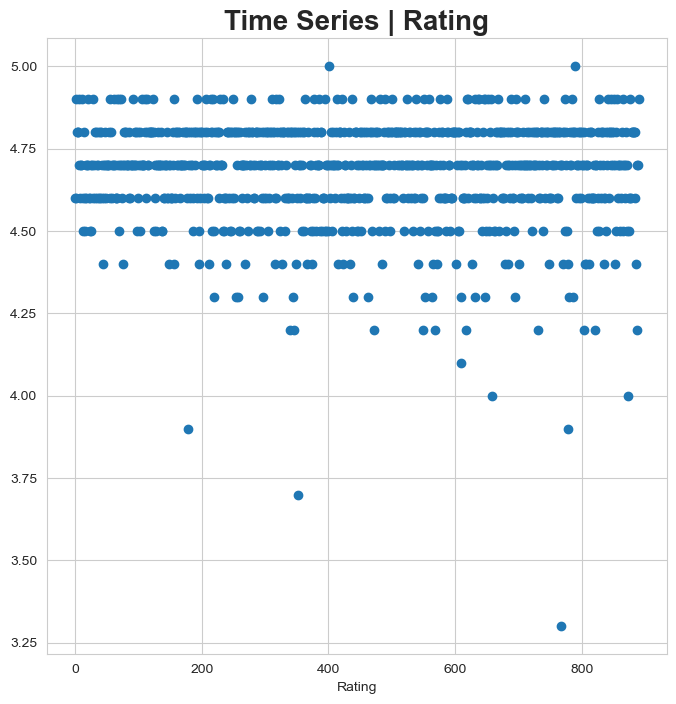

In [347]:
# Create the time-series plot
plt.figure(figsize=(8, 8))
plt.scatter(DATA.index, DATA['Rating'])

# Set the axis labels and plot title
plt.title(
    'Time Series | Rating',
    fontsize=20,
    fontweight='bold'
)
plt.xlabel('Rating')


The ratings of the courses are fairly stable over time, with a mean of 4.6 and a standard deviation of 0.2. This suggests that Coursera has been able to maintain its high quality of teaching over time.

Text(0.5, 0, 'Enrolment')

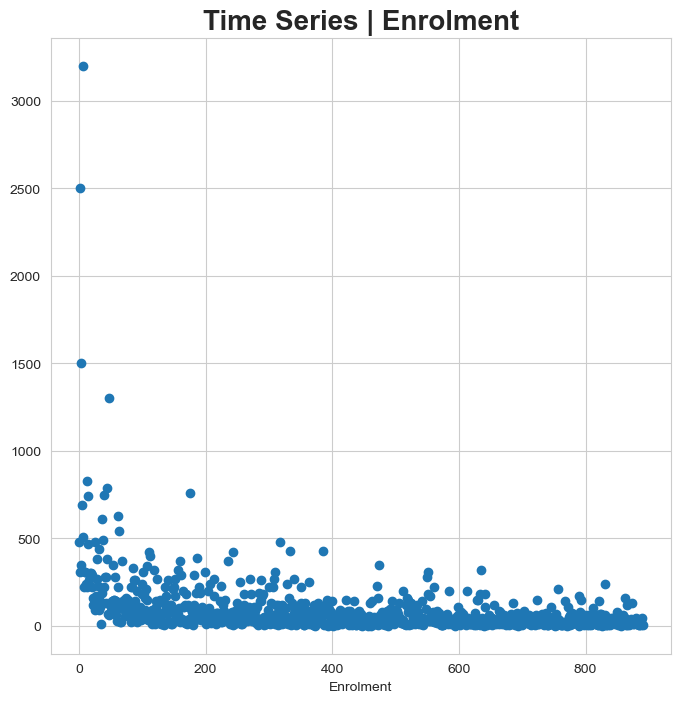

In [348]:
# Create the time-series plot
plt.figure(figsize=(8, 8))
plt.scatter(DATA.index, DATA['Enrolment'])

# Set the axis labels and plot title
plt.title(
    'Time Series | Enrolment',
    fontsize=20,
    fontweight='bold'
)
plt.xlabel('Enrolment')


On the other hand, assuming that as time increases, the number of courses also increase, the enrolment quantity for a Coursera course appear to decrease slightly and this variable look to become less extreme.

## Suggestions for Future Improvement
The project also had some significant limitations that affected the validity and generalizability of the results. Some limitations and challenges of the data analysis are:

- The data set may not be representative of all the courses offered by Coursera or other online learning platforms.
- The data set may not capture all the relevant features or attributes of a course that could affect its popularity or quality.
- The data set may contain errors or inconsistencies due to web scraping or data processing techniques.
- The word analysis of the courses based on their summaries may not reflect the actual contents or learning outcomes of the courses.

Some suggestions for future improvement are:

- To increase the diversity and coverage of the courses, more subjects and providers should be added to the platform, especially in areas such as Education, Engineering, Law, and Mathematics.
- To enhance the quality and relevance of the courses, more feedback mechanisms should be implemented to collect user reviews and ratings, as well as to monitor learner progress and satisfaction.
- To improve the word analysis of the courses based on their summaries or subjects, other methods such as natural language processing or topic modeling could be used to extract keywords and themes from the text data.
- To provide more characteristics of a course that could help learners make informed decisions, such as prerequisites, learning outcomes, assessments, certificates, or career paths.